<h3 align="right">hPu, &nbsp; dSPN, &nbsp; 150917_c9_D1, &nbsp; AB5_porta80A_cel12 </h3>

# Model selection

## Model data

In [40]:
import cell_model, cell_evaluator
morphofile = 'morphology/AB5_porta80A_cel12.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_507.soma.v': 'expdata/ECBL_IV_ch1_507.dat',
    'IV_511.soma.v': 'expdata/ECBL_IV_ch1_511.dat',    
    'IDthresh-sub_547.soma.v': 'expdata/ECBL_IDthresh_ch1_547.dat',    
    'IDthresh_548.soma.v': 'expdata/ECBL_IDthresh_ch1_548.dat',    
    'IDthresh_550.soma.v': 'expdata/ECBL_IDthresh_ch1_550.dat',    
    'IDthresh_561.soma.v': 'expdata/ECBL_IDthresh_ch1_561.dat',    
}

## Simulation environment

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [42]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [43]:
from utils import *

In [44]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [45]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [46]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/AB5_porta80A_cel12.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.basal: cat

In [47]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [48]:
simulator = ephys.simulators.NrnSimulator()

In [49]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [50]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


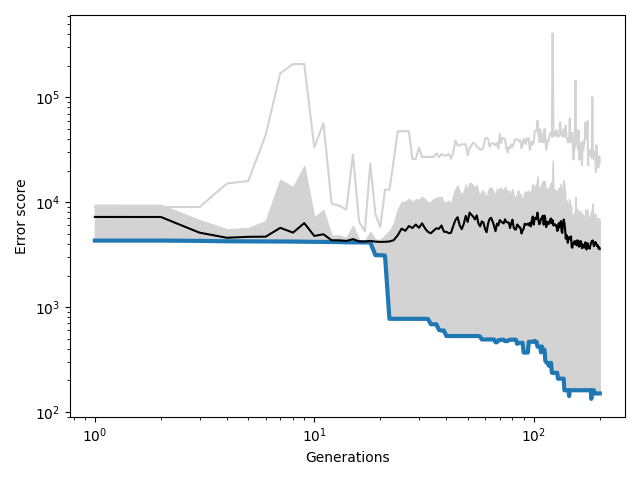

In [51]:
plot_log(log)

In [52]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.02632,0.03211,0.03245,0.03102,0.0402,0.03105,0.02853,0.03792,0.02941,0.03502
g_pas.somatic,0.0003225,7.551e-05,0.0001109,4.936e-05,7.656e-05,1.305e-05,0.0002112,2.768e-05,4.936e-05,0.0002262
g_pas.basal,1.001e-05,1.001e-05,1.005e-05,1.001e-05,1.002e-05,1.001e-05,1.154e-05,1.004e-05,1.002e-05,1.001e-05
gbar_naf.axonal,3.586,1.164,3.175,3.931,2.87,3.435,3.93,4.04,3.931,4.547
gbar_kas.axonal,0.04461,0.08317,0.3533,0.001671,0.3046,0.1182,0.5378,0.135,0.001725,0.01833
gbar_Im.axonal,0.1284,0.03757,0.003437,0.0304,0.003437,0.1109,0.1592,0.04374,0.03269,0.02016
gbar_naf.somatic,9.685,9.964,10.49,10.5,10.54,10.49,10.99,10.07,10.44,10.26
gbar_kaf.somatic,0.002441,0.1224,0.3015,0.3099,0.2515,0.2754,0.006687,0.1747,0.3099,0.06767
gbar_kas.somatic,0.0001759,0.001462,0.0001598,0.0001503,0.0001433,0.002159,2.836e-06,0.0008384,0.0006627,0.001019
gbar_kdr.somatic,4.574e-05,0.005309,0.0008881,0.002567,0.0008881,0.005309,0.002333,0.004394,0.001023,0.0003261


<IPython.core.display.Javascript object>


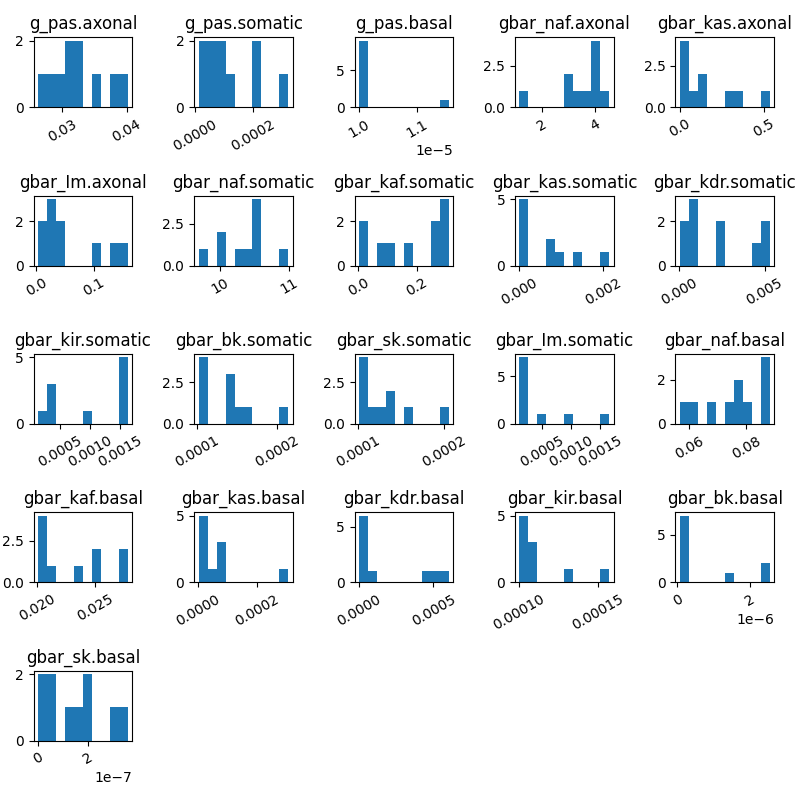

In [53]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


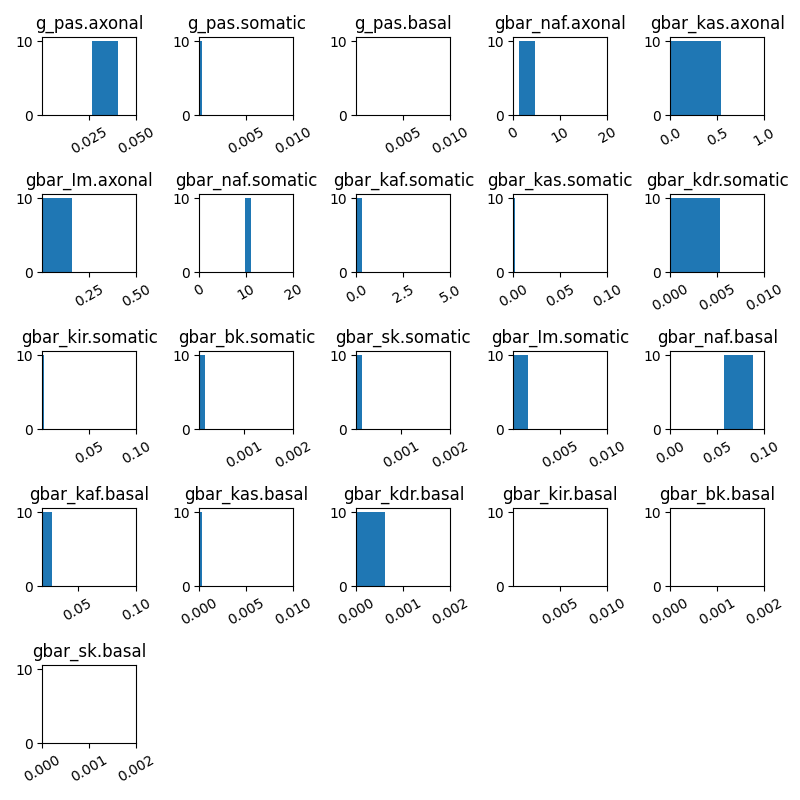

In [54]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [55]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


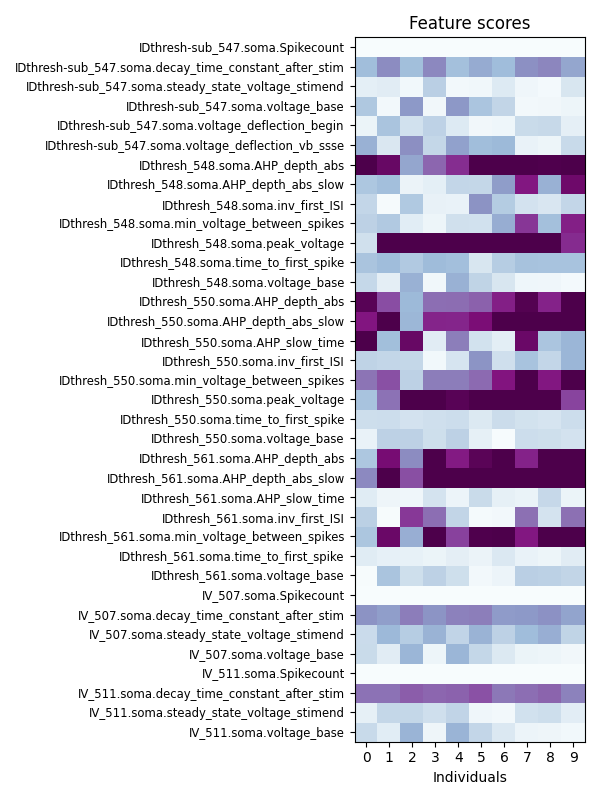

In [56]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [57]:
ind = 0
test_parameters = best_models[ind]

In [58]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


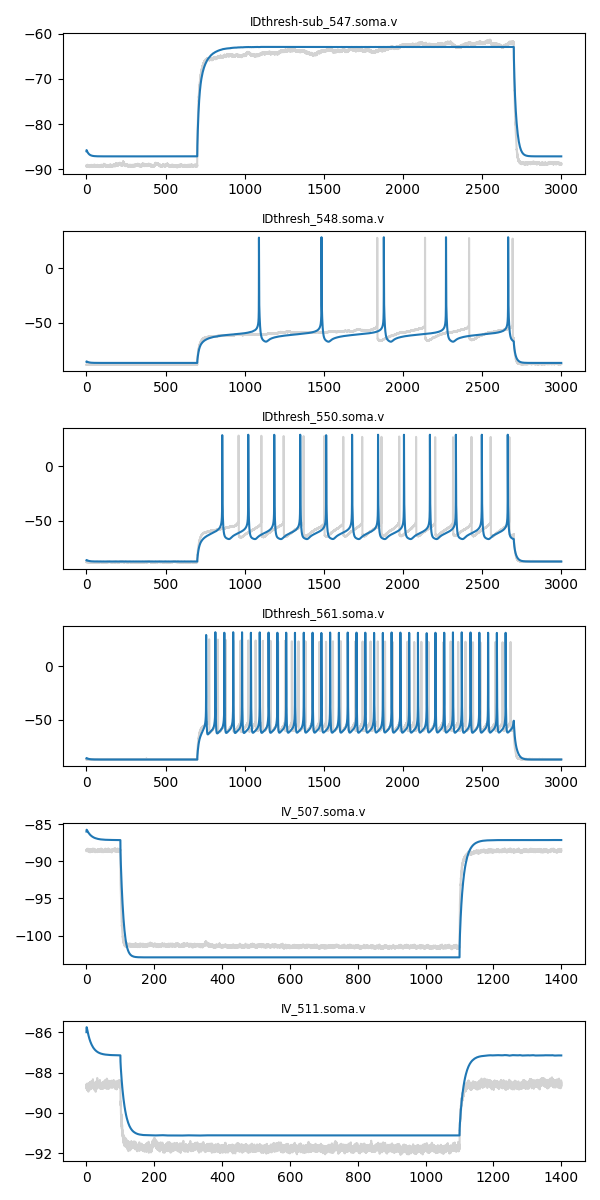

In [59]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


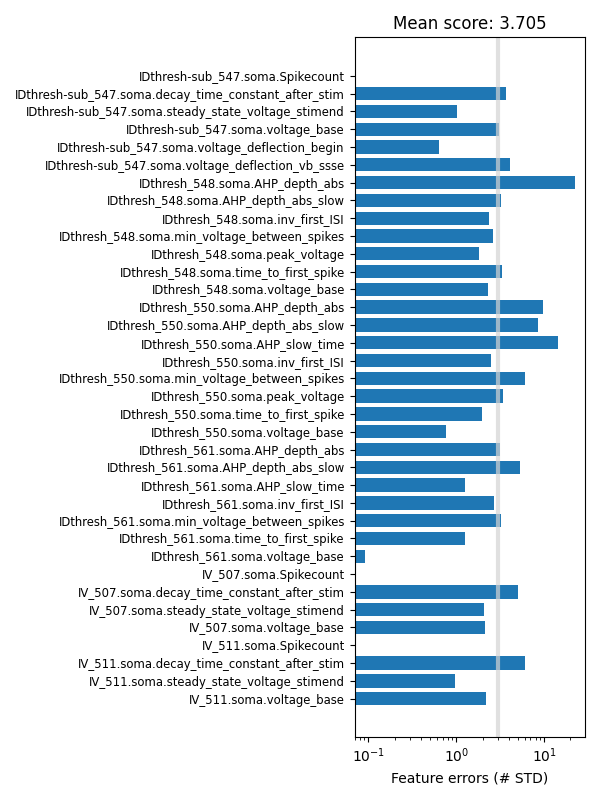

In [60]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [61]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.560000,2.460000,2.430000,2.500000,2.590000,2.500000,2.140000,2.550000,2.410000
1,2.560000,0.000000,2.200000,2.370000,2.190000,1.350000,2.460000,2.000000,2.220000,1.690000
2,2.460000,2.200000,0.000000,2.150000,0.300000,2.260000,2.360000,2.340000,2.220000,2.060000
3,2.430000,2.370000,2.150000,0.000000,2.130000,2.510000,2.590000,2.180000,0.970000,2.440000
4,2.500000,2.190000,0.300000,2.130000,0.000000,2.250000,2.400000,2.300000,2.210000,2.090000
5,2.590000,1.350000,2.260000,2.510000,2.250000,0.000000,2.290000,2.010000,2.380000,2.130000
6,2.500000,2.460000,2.360000,2.590000,2.400000,2.290000,0.000000,2.570000,2.600000,2.620000
7,2.140000,2.000000,2.340000,2.180000,2.300000,2.010000,2.570000,0.000000,2.190000,2.370000
8,2.550000,2.220000,2.220000,0.970000,2.210000,2.380000,2.600000,2.190000,0.000000,2.160000
9,2.410000,1.690000,2.060000,2.440000,2.090000,2.130000,2.620000,2.370000,2.160000,0.000000


In [62]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)